<a href="https://colab.research.google.com/github/utkarshanand336/Data-Science-Projects/blob/main/Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,CategoricalNB,ComplementNB

In [99]:
df = pd.read_csv("/content/adult.csv")

In [ ]:
df

In [ ]:
df.info()

In [102]:
df = df.drop([' 13',' 2174',' 0',' 40',' 77516','39'], axis = 1)

In [ ]:
df

In [110]:
df.rename(columns= {' State-gov': 'Employment Status', ' Bachelors':'Bachelors',' Never-married':'Marital Status',' Adm-clerical':'Post',' Not-in-family':'Family Status',' White':'Race',' Male':'Gender',' United-States':'Country',' <=50K':'Total_Income'}, inplace=True)


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 0 to 32559
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Employment Status  32560 non-null  int64
 1   Bachelors          32560 non-null  int64
 2   Marital Status     32560 non-null  int64
 3   Post               32560 non-null  int64
 4   Family Status      32560 non-null  int64
 5   Race               32560 non-null  int64
 6   Gender             32560 non-null  int64
 7   Country            32560 non-null  int64
 8   Total_Income       32560 non-null  int64
dtypes: int64(9)
memory usage: 2.5 MB


In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
df.columns = df.columns.str.strip()

In [114]:
encoder=LabelEncoder()
df['Bachelors']=encoder.fit_transform(df['Bachelors'])
df['Employment Status']=encoder.fit_transform(df['Employment Status'])
df['Marital Status']=encoder.fit_transform(df['Marital Status'])
df['Post']=encoder.fit_transform(df['Post'])
df['Family Status']=encoder.fit_transform(df['Family Status'])
df['Race']=encoder.fit_transform(df['Race'])
df['Gender']=encoder.fit_transform(df['Gender'])
df['Country']=encoder.fit_transform(df['Country'])
df['Total_Income']=encoder.fit_transform(df['Total_Income'])

In [ ]:
df['Country']

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

In [ ]:
df.duplicated().sum()
df.drop_duplicates(keep = 'first')

In [ ]:
df.duplicated().sum()

In [ ]:
x = df.iloc[:,[0,7]]
y = df.iloc[:,[8,]]
print(x)
print(y)

In [129]:
print(x.shape)
print(y.shape)

(32560, 2)
(32560, 1)


In [130]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [131]:
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[ 0.78642295,  0.28834096],
       [ 0.0921817 ,  0.28834096],
       [-2.68478326, -3.09736235],
       ...,
       [-1.99054202, -4.79021401],
       [-2.68478326,  0.28834096],
       [ 1.48066419,  0.28834096]])

In [ ]:
y=y.flatten()
y.ndim

In [132]:
gn = GaussianNB()

In [133]:
gn.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [146]:
pred=gn.predict(X_test)

In [147]:
df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

In [ ]:
pred=pd.DataFrame([pred])
print(pred)
print(y_test)

In [149]:
ac=y_test
print(ac)

       Total_Income
22278             1
8950              0
7838              0
16505             0
19140             0
...             ...
25756             0
21949             1
26404             1
23236             0
26822             0

[9768 rows x 1 columns]


In [157]:
df = pd.DataFrame(df, index = df.index, columns = df.columns)

In [158]:
ml = MultinomialNB()
ml.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [159]:
pred1=ml.predict(x)
print(pred1)
print(y_test)

[0 0 0 ... 0 0 0]
       Total_Income
22278             1
8950              0
7838              0
16505             0
19140             0
...             ...
25756             0
21949             1
26404             1
23236             0
26822             0

[9768 rows x 1 columns]


In [ ]:
bn = BernoulliNB()
bn.fit(X_train,y_train)
pred2 = bn.predict(x)

In [ ]:
plt.plot(x,pred2)
plt.ylabel('Purchased')
plt.xlabel('Estimated Salary')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


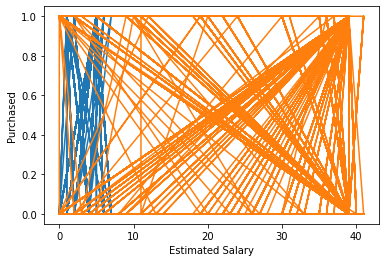

In [164]:
cg = CategoricalNB()
cg.fit(X_train, y_train)
pred3 = cg.predict(x)
plt.ylabel('Purchased')
plt.xlabel('Estimated Salary')
plt.plot(x,pred3)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


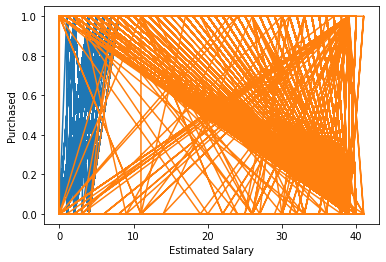

In [165]:
cm = ComplementNB()
cm.fit(X_train,y_train)
pred4 = cm.predict(x)
plt.ylabel('Purchased')
plt.xlabel('Estimated Salary')
plt.plot(x,pred4)

In [166]:
df.to_csv("Income_Prediction")